In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")


Датасет представляет собой качества вин с учетом различных признаков. Красные вина - winequality-red.csv, белые вина - winequality-white.csv
Было принято решение объединить оба типа вин в один датасет и добавить еще один бинарный признак: 0 - белое вино, 1 - красное

In [89]:
red_wines = pd.read_csv("winequality-red.csv", sep = ';', engine = 'python')
white_wines = pd.read_csv("winequality-white.csv", sep = ';', engine = 'python')

In [90]:
red_wines["is_red"] = pd.Series(np.ones(red_wines.shape[0]))
white_wines["is_red"] = pd.Series(np.zeros(white_wines.shape[0]))
wines = pd.concat([red_wines, white_wines])

Для удобства, вернем колонку "quality" на последнее место в датафрейме

In [91]:
columns = wines.columns.tolist()
columns = columns[:-2] + [columns[-1]] + [columns[-2]]
wines = wines[columns]

In [92]:
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_red,quality
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,1.0,5
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,1.0,5
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,1.0,5
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,1.0,6
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,1.0,5
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,1.0,5
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.400000,1.0,5
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,1.0,7
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,1.0,7
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,1.0,5


These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 

The attributes are (dontated by Riccardo Leardi, riclea '@' anchem.unige.it ) 
1. Alcohol 
2. Malic acid 
3. Ash 
4. Alcalinity of ash 
5. Magnesium 
6. Total phenols 
7. Flavanoids 
8. Nonflavanoid phenols 
9. Proanthocyanins 
10. Color intensity 
11. Hue 
12. OD280/OD315 of diluted wines 
13. Proline 

In [93]:
print(wines.shape)
print(wines.columns)

(6497, 13)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'is_red', 'quality'],
      dtype='object')


In [94]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_red,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,0.246114,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.430779,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,0.000000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,0.000000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,0.000000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000,9.000000


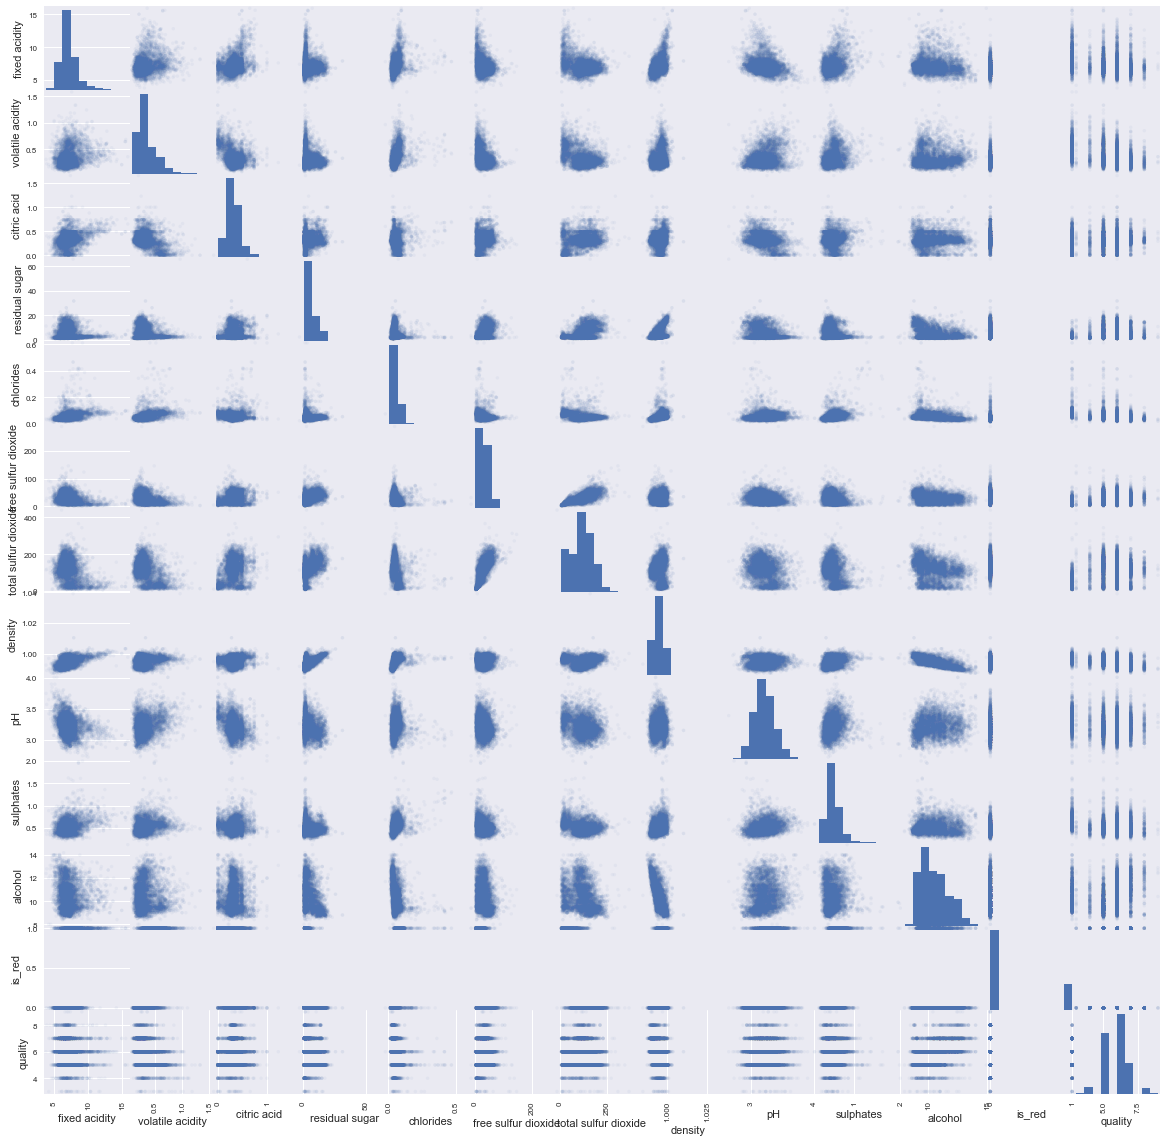

In [95]:
from pandas.plotting import scatter_matrix
scatter_matrix(wines, alpha=.05, figsize=(20, 20))
pass

In [96]:
wines.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_red,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,0.486740,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,0.653036,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,-0.187397,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.348821,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,0.512678,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,-0.471644,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.700357,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,0.390645,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.329129,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.487218,0.038485


Сильной корелляции данных не наблюдается, за исключением "free sulfur dioxide" и "total solfur dioxide", что очевидно, а также "alcohol" и "density".

График зависимости количества алкоголя от полтности вина

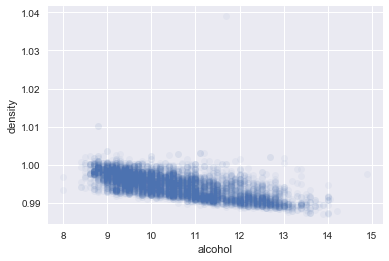

In [97]:
plt.plot(wines['alcohol'], wines['density'], 'o', alpha = 0.05)
plt.xlabel('alcohol')
plt.ylabel('density')
pass

Так как мы изучаем зависимость качества вина от его признаков, то интересно пронаблюдать его корреляцию с другими признаками. 
Так самой большой корреляцией с качеством вина обладает количество алкоголя в вине. Причем, значение корреляции положительно, а значит можно предположить, что чем крепче вино, тем с большей вероятностью оно будет обладать более высоким качеством.

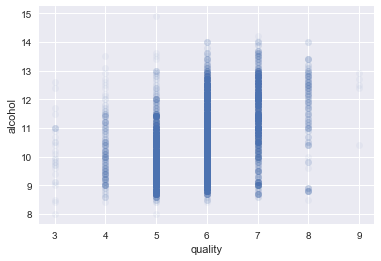

In [98]:
plt.plot(wines['quality'], wines['alcohol'], 'o', alpha=0.05)
plt.xlabel('quality')
plt.ylabel('alcohol')
pass


Также интересно пронаблюдать белые и красные вина по отдельности.

In [99]:
wines[wines["is_red"] == 1.0].corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_red,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,NaN,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,NaN,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,NaN,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,NaN,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,NaN,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,NaN,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,NaN,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,NaN,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,NaN,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,NaN,0.251397


In [100]:
wines[wines["is_red"] == 0.0].corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_red,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,NaN,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,NaN,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,NaN,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,NaN,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,NaN,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,NaN,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,NaN,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,NaN,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,NaN,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,NaN,0.053678


Интересных наблюдений в корреляции признаков с качеством на основе вида вин замечено не было. Однако, для белых вин зависимость между плотностью и количеством остаточного сахара оказалась выражена гораздо сильнее, чем для красных вин

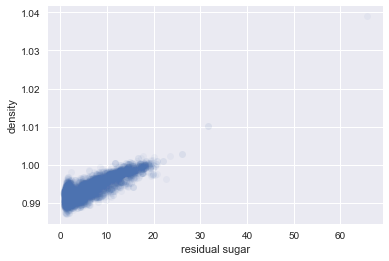

In [101]:
plt.plot(wines[wines["is_red"] == 0.0]['residual sugar'], wines[wines["is_red"] == 0.0]['density'], 'o', alpha=0.05)
plt.xlabel('residual sugar')
plt.ylabel('density')
pass


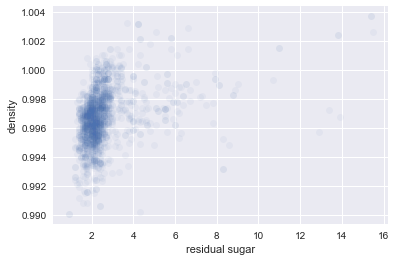

In [102]:
plt.plot(wines[wines["is_red"] == 1.0]['residual sugar'], wines[wines["is_red"] == 1.0]['density'], 'o', alpha=0.05)
plt.xlabel('residual sugar')
plt.ylabel('density')
pass

#Предсказание качества вина на основе признаков

Для алгоритма ближайших соседей необходимо разделить признаки на категориальные и численные. В качестве категориальных в выборке представлены признаки "quality" и "is_red", причем "is_red" является бинарным.

In [103]:
wines["quality"] = wines["quality"].astype(object)
wines["is_red"] = wines["is_red"].astype(object)

Список категориальных и численных признаков

In [104]:
categorical_columns = [c for c in wines.columns if wines[c].dtype.name == 'object']
numerical_columns   = [c for c in wines.columns if wines[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['is_red', 'quality']
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [105]:
for category in categorical_columns:
    print(category, wines[category].unique())

is_red [1.0 0.0]
quality [5 6 7 4 8 3 9]


Для численных признаков необходимо провести нормализацию

In [106]:
wines_numerical = wines[numerical_columns]
wines_numerical = (wines_numerical - wines_numerical.mean()) / wines_numerical.std()

In [107]:
wines_numerical.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03
mean,9.396824e-16,-2.652262e-14,4.807301e-14,-2.252111e-15,1.278966e-14,-6.367933e-17,-5.225926e-16,2.181060e-12,-3.317152e-14,-6.607989e-15,-1.231775e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.634386e+00,-1.577208e+00,-2.192664e+00,-1.017956e+00,-1.342536e+00,-1.663455e+00,-1.941631e+00,-2.529997e+00,-3.100376e+00,-2.091774e+00,-2.089189e+00
25%,-6.288845e-01,-6.661100e-01,-4.722972e-01,-7.657389e-01,-5.147590e-01,-7.620156e-01,-6.854795e-01,-7.858922e-01,-6.748102e-01,-6.805395e-01,-8.315512e-01
50%,-1.660764e-01,-3.016707e-01,-5.940918e-02,-5.135217e-01,-2.578628e-01,-8.593639e-02,3.990360e-02,6.448391e-02,-5.287017e-02,-1.429263e-01,-1.608107e-01
75%,3.738663e-01,3.664680e-01,4.911081e-01,5.584015e-01,2.559297e-01,5.901428e-01,7.122099e-01,7.647937e-01,6.312639e-01,4.618885e-01,6.776148e-01
max,6.698910e+00,7.533774e+00,9.230570e+00,1.268585e+01,1.584097e+01,1.456245e+01,5.736815e+00,1.476765e+01,4.922650e+00,9.870119e+00,3.695947e+00


Объединим все полученные признаки

In [108]:
wines = pd.concat((wines_numerical, wines["is_red"], wines["quality"]), axis=1)
wines


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_red,quality
0,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.812950,0.193082,-0.915394,1,5
1,0.451001,3.281982,-2.192664,-0.597594,1.197883,-0.311296,-0.862402,0.701432,-0.115064,0.999502,-0.580023,1,5
2,0.451001,2.553104,-1.917405,-0.660648,1.026618,-0.874695,-1.092402,0.768128,0.258100,0.797897,-0.580023,1,5
3,3.073580,-0.362411,1.660957,-0.744721,0.541370,-0.762016,-0.986248,1.101609,-0.363840,0.327485,-0.580023,1,6
4,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.812950,0.193082,-0.915394,1,5
5,0.142462,1.945705,-2.192664,-0.765739,0.541370,-0.987375,-1.340094,1.034913,1.812950,0.193082,-0.915394,1,5
6,0.528136,1.581266,-1.779776,-0.807775,0.370106,-0.874695,-1.003940,0.568040,0.506876,-0.478935,-0.915394,1,5
7,0.065328,1.884965,-2.192664,-0.891847,0.255930,-0.874695,-1.676247,-0.032226,1.066622,-0.411733,-0.412338,1,7
8,0.451001,1.459786,-2.055034,-0.723703,0.484282,-1.212735,-1.729324,0.701432,0.880040,0.260284,-0.831551,1,7
9,0.219597,0.973867,0.284664,0.138039,0.427194,-0.762016,-0.243173,1.034913,0.817846,1.805921,0.006874,1,5


Уберем столбец "quality"

In [109]:
X = wines.drop(('quality'), axis=1)
y = wines['quality']
feature_names = X.columns

In [110]:
y = y.astype(int)

In [111]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_red,quality
0,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.812950,0.193082,-0.915394,1,5
1,0.451001,3.281982,-2.192664,-0.597594,1.197883,-0.311296,-0.862402,0.701432,-0.115064,0.999502,-0.580023,1,5
2,0.451001,2.553104,-1.917405,-0.660648,1.026618,-0.874695,-1.092402,0.768128,0.258100,0.797897,-0.580023,1,5
3,3.073580,-0.362411,1.660957,-0.744721,0.541370,-0.762016,-0.986248,1.101609,-0.363840,0.327485,-0.580023,1,6
4,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.812950,0.193082,-0.915394,1,5


Делим выборку на обучающую и тестовую

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

N_train, _ = X_train.shape
N_test, _ = X_test.shape

print(N_train, N_test)


4547 1950


In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [114]:
import operator

def train_and_predict(classifier, classifier_name, df_output, has_feature_imp=False):
    classifier.fit(X_train, y_train)

    y_test_predict = classifier.predict(X_test)

    err_train = np.mean(y_train != classifier.predict(X_train))
    err_test = np.mean(y_test != y_test_predict)

    most_important = None
    if has_feature_imp:
        importances = classifier.feature_importances_
        indices = np.argsort(importances)[::-1]
        most_important = feature_names[indices[0]]

    if df_output is not None:
        df_output.loc[len(df_output)] = [classifier_name, err_train, err_test, most_important]
        
    return err_train, err_test


output = pd.DataFrame(data=[], columns=["Classifier", "Err train", "Err test", "Most important feature"])


## kNN

In [115]:
errors = []
values = range(1, 10)
for n_neighb in values:
    knn = KNeighborsClassifier(n_neighbors=n_neighb)
    train_error, test_error = train_and_predict(knn, "kNN", None)
    errors.append((n_neighb, train_error, test_error))

optimal_knn = list(sorted(errors, key=operator.itemgetter(2)))[0]
optimal_knn

(1, 0.0, 0.41794871794871796)

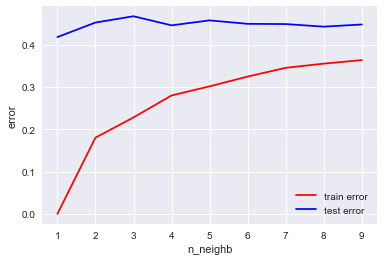

In [116]:
plt.plot(values, list(map(operator.itemgetter(1), errors)), 'r-', label='train error')
plt.plot(values, list(map(operator.itemgetter(2), errors)), 'b-', label='test error')
plt.xlabel('n_neighb')
plt.ylabel('error')
plt.legend()

In [117]:
train_and_predict(KNeighborsClassifier(n_neighbors=optimal_knn[0]), "kNN", output)

(0.0, 0.41794871794871796)

## LDA

In [118]:
train_and_predict(LDA(), "LDA", output)

(0.45788431933142731, 0.4605128205128205)

## QDA

In [119]:
train_and_predict(QDA(), "QDA", output)

C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


(0.50670771937541237, 0.52205128205128204)

## Logistic Regression

In [120]:
train_and_predict(LR(), "Logistic", output)

(0.45590499230261711, 0.46256410256410257)

## SVC

In [121]:
from ipywidgets import *
from IPython.display import display


def svc(C, gamma):
    print(train_and_predict(SVC(kernel='rbf', C=C, gamma=gamma), 'SVC', None))
  
    
interact(svc, C=FloatSlider(min=0.1, max=50, step=0.1, value=4.0), gamma=FloatSlider(min=0.1, max=50, step=0.1, value=1.1))
pass

In [122]:
parameter_values = np.concatenate((np.arange(0.1, 3, 0.1), np.arange(3, 10, 1), np.arange(10, 31, 5)))
errors = []
i_am_ready_to_wait_2_hours = False
optimal_svc=(4.0, 1.1)
if i_am_ready_to_wait_2_hours:
    for param_c in parameter_values:
        for param_gamma in parameter_values:
            # print("{0} / {1}".format(i, len(parameter_values) ** 2))
            train_error, test_error = train_and_predict(SVC(kernel='rbf', C=param_c, gamma=param_gamma), 'SVC', None)
            errors.append((param_c, param_gamma, train_error, test_error))
        
    optimal_svc = list(sorted(errors, key=operator.itemgetter(3)))[0]
    optimal_svc

In [123]:
optimal_svc

(4.0, 1.1)

In [124]:
if i_am_ready_to_wait_2_hours:
    train_errors_c = dict([(entry[0], entry[2]) for entry in errors])
    test_errors_c = dict([(entry[0], entry[3]) for entry in errors])
    plt.plot(parameter_values, list(train_errors_c.values()), 'r-', label='train error')
    plt.plot(parameter_values, list(test_errors_c.values()), 'b-', label='test error')
    plt.xlabel('c')
    plt.ylabel('error')
    plt.legend()

In [125]:
if i_am_ready_to_wait_2_hours:
    train_errors_gamma = dict([(entry[1], entry[2]) for entry in errors])
    test_errors_gamma = dict([(entry[1], entry[3]) for entry in errors])
    plt.plot(list(train_errors_gamma.keys()), list(train_errors_gamma.values()), 'r-', label='train error')
    plt.plot(list(test_errors_gamma.keys()), list(test_errors_gamma.values()), 'b-', label='test error')
    plt.xlabel('gamma')
    plt.ylabel('error')
    plt.legend()

In [126]:
train_and_predict(SVC(kernel='rbf', C=optimal_svc[0], gamma=optimal_svc[1]), 'SVC', output)

(0.0087970090169342419, 0.36769230769230771)

## Random Forest

In [127]:
errors = []
values = np.concatenate((np.arange(1, 10, 1), np.arange(10, 500, 50)))
for n_trees in values:
    train_error, test_error = train_and_predict(ensemble.RandomForestClassifier(n_estimators=n_trees), "Random Forest", None)
    errors.append((n_trees, train_error, test_error))

optimal_rf = list(sorted(errors, key=operator.itemgetter(2)))[0]
optimal_rf

(360, 0.0, 0.32512820512820512)

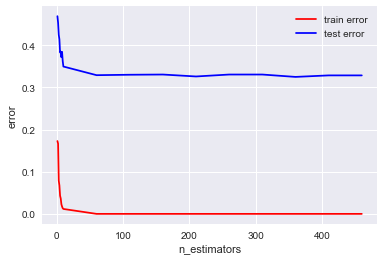

In [128]:
plt.plot(values, list(map(operator.itemgetter(1), errors)), 'r-', label='train error')
plt.plot(values, list(map(operator.itemgetter(2), errors)), 'b-', label='test error')
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend()

In [129]:
train_and_predict(ensemble.RandomForestClassifier(n_estimators=optimal_rf[0]), "Random Forest", output, has_feature_imp=True)

(0.0, 0.32871794871794874)

## Extremely Randomized Trees

In [146]:
errors = []
values = np.concatenate((np.arange(1, 10, 1), np.arange(10, 100, 50)))
for n_trees in values:
    train_error, test_error = train_and_predict(ensemble.ExtraTreesClassifier(n_estimators=n_trees), "Extra Random Forest", None)
    errors.append((n_trees, train_error, test_error))

optimal_ert = list(sorted(errors, key=operator.itemgetter(2)))[0]
optimal_ert

(60, 0.0, 0.32923076923076922)

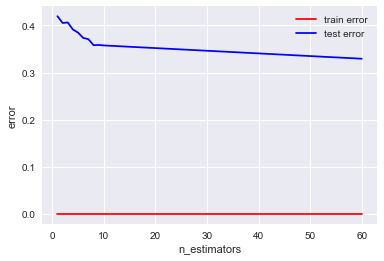

In [147]:
plt.plot(values, list(map(operator.itemgetter(1), errors)), 'r-', label='train error')
plt.plot(values, list(map(operator.itemgetter(2), errors)), 'b-', label='test error')
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend()

In [150]:
train_and_predict(ensemble.ExtraTreesClassifier(n_estimators=optimal_ert[0]), "Extra Random Forest", output, has_feature_imp=True)

(0.0, 0.3282051282051282)

## AdaBoost

In [133]:
errors = []
values = np.arange(1, 20, 1)
for n_est in values:
    train_error, test_error = train_and_predict(ensemble.AdaBoostClassifier(n_estimators=n_est), "AdaBoost", None)
    errors.append((n_est, train_error, test_error))

optimal_ada = list(sorted(errors, key=operator.itemgetter(2)))[0]
optimal_ada

(3, 0.53331867165163849, 0.52769230769230768)

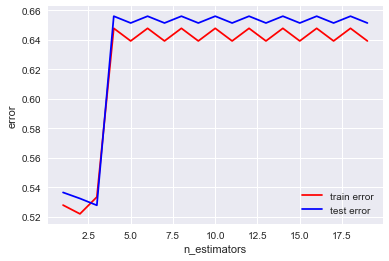

In [134]:
plt.plot(values, list(map(operator.itemgetter(1), errors)), 'r-', label='train error')
plt.plot(values, list(map(operator.itemgetter(2), errors)), 'b-', label='test error')
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend()

In [135]:
train_and_predict(ensemble.AdaBoostClassifier(n_estimators=optimal_ada[0]), "AdaBoost", output, has_feature_imp=True)

(0.53331867165163849, 0.52769230769230768)

## GBT

In [136]:
errors = []
values = np.concatenate((np.arange(1, 10, 1), np.arange(10, 1000, 50)))
for n_est in values:
    train_error, test_error = train_and_predict(ensemble.GradientBoostingClassifier(n_estimators=n_est), "GBT", None)
    errors.append((n_est, train_error, test_error))

optimal_gbt = list(sorted(errors, key=operator.itemgetter(2)))[0]
optimal_gbt

(610, 0.059599736089729495, 0.35743589743589743)

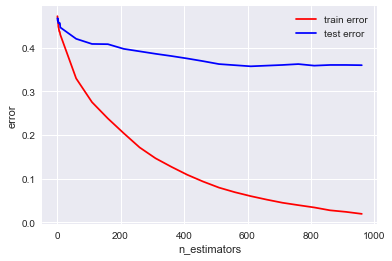

In [137]:
plt.plot(values, list(map(operator.itemgetter(1), errors)), 'r-', label='train error')
plt.plot(values, list(map(operator.itemgetter(2), errors)), 'b-', label='test error')
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend()

In [138]:
train_and_predict(ensemble.GradientBoostingClassifier(n_estimators=optimal_gbt[0]), "GBT", output, has_feature_imp=True)

(0.059599736089729495, 0.35846153846153844)

## DecisionTree

In [139]:
errors = []
for n_depth in np.arange(1, 25, 1):
    train_error, test_error = train_and_predict(DecisionTreeClassifier(max_depth=n_depth), "DecisionTree", None)
    errors.append((n_depth, train_error, test_error))

optimal_dt = list(sorted(errors, key=operator.itemgetter(2)))[0]
optimal_dt

(24, 0.0, 0.41538461538461541)

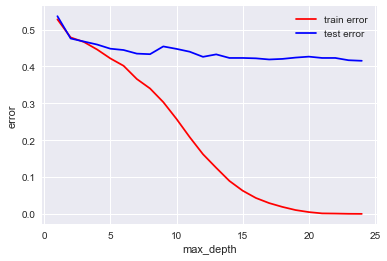

In [140]:
plt.plot(np.arange(1, 25, 1), list(map(operator.itemgetter(1), errors)), 'r-', label='train error')
plt.plot(np.arange(1, 25, 1), list(map(operator.itemgetter(2), errors)), 'b-', label='test error')
plt.xlabel('max_depth')
plt.ylabel('error')
plt.legend()

In [141]:
train_and_predict(DecisionTreeClassifier(max_depth=optimal_dt[0]), "DecisionTree", output, has_feature_imp=True)

(0.0, 0.41948717948717951)

## Naive Bayes

In [142]:
train_and_predict(GaussianNB(), "GuassianNB", output)

(0.65691664833956454, 0.6579487179487179)

In [174]:
output.sort_values('Err test')

,Classifier,Err train,Err test,Most important feature
10,Extra Random Forest,0.000000,0.328205,alcohol
5,Random Forest,0.000000,0.328718,alcohol
7,GBT,0.059600,0.358462,density
4,SVC,0.008797,0.367692,None
0,kNN,0.000000,0.417949,None
8,DecisionTree,0.000000,0.419487,alcohol
1,LDA,0.457884,0.460513,None
3,Logistic,0.455905,0.462564,None
2,QDA,0.506708,0.522051,None
6,AdaBoost,0.533319,0.527692,alcohol


Из таблицы видно, что лучше всех себя показал Extra Forest Tree классификатор. Также видно, что EFT выбрал количество алкоголя в качестве самого главного признака, как и большинство других классификаторов, которые, несмотря на это, показали себя хуже

In [188]:
from sklearn.decomposition import PCA

In [189]:
errors = []
values = np.arange(1, 12, 1)
for pca_components in values:
    pca = PCA(n_components=pca_components)
    pca.fit(X_train)
    train_error, test_error = train_error, test_error = train_and_predict(ensemble.GradientBoostingClassifier(n_estimators=n_est), "GBT", None)
    errors.append((pca_components, train_error, test_error))

print(list(sorted(errors, key=operator.itemgetter(2)))[0])

(2, 0.018913569386408622, 0.35743589743589743)


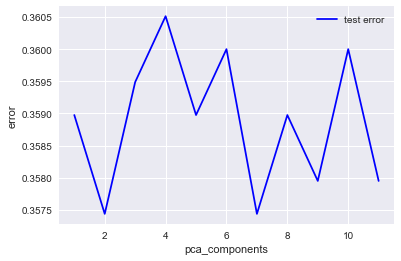

In [191]:

plt.plot(values, list(map(operator.itemgetter(2), errors)), 'b-', label='test error')
plt.xlabel('pca_components')
plt.ylabel('error')
plt.legend()